# Analysis of Approved Loans
    1. Analysis on Loan Amount.
    2. Loan amount frequency distribution.
    3. Number of Loans over time.
    4. Average Loan Amount over time
    5. Relationship between Loan Amount and Loan status.
    6. Distributin of Loan Amount over Purpose
    7. Analysis on Interest Rate.
    8. Interest Rate Distribution
    9. Relationsip between Interest Rate and Term.

# Analysis of Probability Of Charge Off
    1. Relationship between Location and Probablitlity of Charge Off
    2. Relationship between Purpose and Probablitlity of Charge Off
    3. Relationship between Interest Rate and Probablitlity of Charge Off
    4. Relationship between Annual Income and Probablitlity of Charge Off
    5. Relationship between Grade/Sub-grade and Probablitlity of Charge Off
    6. Relationship between Employment Length and Probablitlity of Charge Off


# Conclusion:

Top-5 Major variables to consider for loan prediction: 
    1. Purpose of Loan 
    2. Employment Length 
    3. Grade 
    4. Interest Rate 
    5. Term


In [13]:
# Read loan data from lending club

import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
import datetime

loan_data = pd.read_csv('loan.csv')
loan_data.head()

C:\Users\mohan\Anaconda3\envs\cryptocurrency-analysis\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [101]:
# Check NaN columns
loan_data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

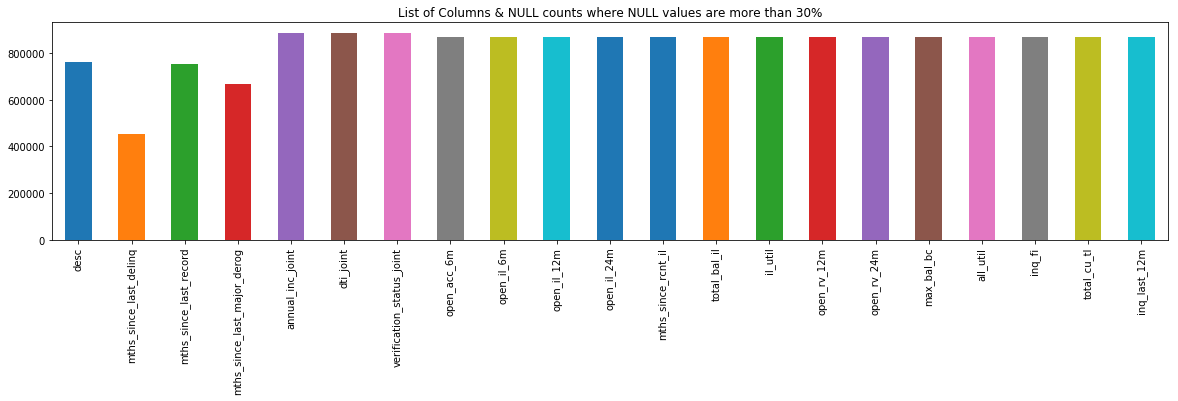

In [14]:
# List of Columns & NULL column counts where NULL values are more than 30%
import matplotlib.pyplot as plt
%matplotlib inline

NULL_col = loan_data.isnull().sum()
NULL_col = NULL_col[NULL_col.values >(0.3*len(loan_data))]
plt.figure(figsize=(20,4))
NULL_col.plot(kind='bar')
plt.title('List of Columns & NULL counts where NULL values are more than 30%')
plt.show()

Observation: Above plot shows that there are 20+ columns in the dataset where all the values are NULL.
There are 887379 rows & 74 columns in the dataset, it will be very difficult to look at each column one by one & find the NULL columns or missing values. 

I will find out all columns where missing values are more than certain percentage (say 30%). I will remove those columns as it is not feasable to impute missing values for those columns.

In [15]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [16]:
loan_data.info()

## Remove columns where NULL values are more than or equal to 30% 
loan_data = removeNulls(loan_data, axis =1,percent = 0.3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [17]:
# Remove rows where NULL values are more than or equal to 30%
loan_data = removeNulls(loan_data, axis =0,percent = 0.3)


Number of Rows dropped	:  0

Old dataset rows,columns (887379, 53) 
New dataset rows,columns (887379, 53)


In [18]:
# Remove columns where number of unique value is only 1.
unique = loan_data.nunique()
unique = unique[unique.values == 1]

In [19]:
loan_data.drop(labels = list(unique.index), axis =1, inplace=True)
print("Left with",loan_data.shape ,"rows & columns.")

Left with (887379, 52) rows & columns.


Employment Term : Remove 'n/a' value with 'self-employed'.
There are some values in emp_term which are 'n/a', we assume that are 'self-employed'. Because for 'self-employed' applicants, emp-lenth is 'Not Applicable'

In [20]:
print(loan_data.emp_length.unique())
loan_data.emp_length.fillna('0',inplace=True)
loan_data.emp_length.replace(['n/a'],'Self-Employed',inplace=True)
print(loan_data.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


Remove irrelevant columns.
Till now we have removed the columns based on the count & statistics. Now let's look at each column from business perspective if that is required or not for our analysis such as Unique ID's, URL. As last 2 digits of zip code is masked 'xx', we can remove that as well.

In [21]:
# Cast all continuos variables to numeric

numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan_data[numeric_columns] = loan_data[numeric_columns].apply(pd.to_numeric)

In [110]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,Jan-2016,332.10,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,25274.0,17100.0
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,Jan-2016,797.03,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,140285.0,10200.0
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,Jan-2016,316.07,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,34178.0,18000.0
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,Jan-2016,317.86,Feb-2016,Jan-2016,1.0,INDIVIDUAL,0.0,0.0,58418.0,27000.0
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,Jan-2016,664.20,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,33307.0,41700.0


In [111]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 0 to 887378
Data columns (total 52 columns):
id                            887379 non-null int64
member_id                     887379 non-null int64
loan_amnt                     887379 non-null float64
funded_amnt                   887379 non-null float64
funded_amnt_inv               887379 non-null float64
term                          887379 non-null object
int_rate                      887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_title                     835917 non-null object
emp_length                    887379 non-null object
home_ownership                887379 non-null object
annual_inc                    887375 non-null float64
verification_status           887379 non-null object
issue_d                       887379 non-null object
loan_status                   887379 

Purpose of loan : Drop records where values are less than 0.75%
We will analyse only those categories which contain more than 0.75% of records. Also, we are not aware what comes under 'Other' we will remove this category as well.

In [10]:
(loan_data.purpose.value_counts()*100)/len(loan_data)

debt_consolidation    59.074533
credit_card           23.234942
home_improvement       5.840684
other                  4.833786
major_purchase         1.946970
small_business         1.169399
car                    0.998784
medical                0.962385
moving                 0.610111
vacation               0.533707
house                  0.417747
wedding                0.264487
renewable_energy       0.064798
educational            0.047668
Name: purpose, dtype: float64

In [22]:
del_loan_purpose = (loan_data.purpose.value_counts()*100)/len(loan_data)
del_loan_purpose = del_loan_purpose[(del_loan_purpose < 0.75) | (del_loan_purpose.index == 'other')]

loan_data.drop(labels = loan_data[loan_data.purpose.isin(del_loan_purpose.index)].index, inplace=True)
print("Left with",loan_data.shape ,"rows & columns.")

print(loan_data.purpose.unique())

Left with (827283, 52) rows & columns.
['credit_card' 'car' 'small_business' 'debt_consolidation'
 'home_improvement' 'major_purchase' 'medical']


Loan Status : Drop records where values are less than 1.5%
As we can see, Other than ['Current','Fully Paid' & Charged off] other loan_status are not relevent for our analysis.

In [114]:
(loan_data.loan_status.value_counts()*100)/len(loan_data)

Current                                                68.494457
Fully Paid                                             22.957440
Charged Off                                             4.950664
Late (31-120 days)                                      1.301731
Issued                                                  0.946230
In Grace Period                                         0.702903
Late (16-30 days)                                       0.261217
Does not meet the credit policy. Status:Fully Paid      0.181075
Default                                                 0.136350
Does not meet the credit policy. Status:Charged Off     0.067933
Name: loan_status, dtype: float64

In [12]:
del_loan_status = (loan_data.loan_status.value_counts()*100)/len(loan_data)
del_loan_status = del_loan_status[(del_loan_status < 1.5)]

loan_data.drop(labels = loan_data[loan_data.loan_status.isin(del_loan_status.index)].index, inplace=True)
print("So now we are left with",loan_data.shape ,"rows & columns.")

print(loan_data.loan_status.unique())

So now we are left with (797522, 52) rows & columns.
['Fully Paid' 'Charged Off' 'Current']


In [23]:
loan_data.to_csv('clean_accepted_loans.csv')

In [117]:
not_required_columns = ["id","member_id","url","zip_code"]
loan_data.drop(labels = not_required_columns, axis =1, inplace=True)
print("Left with",loan_data.shape ,"rows & columns.")

Left with (797522, 48) rows & columns.


Derived Metrics

We will now derive some new columns based on our business understanding that will be helpful in our analysis. 

In [97]:
# Loan amount to Annual Income ratio

loan_data['loan_income_ratio']= loan_data['loan_amnt']/loan_data['annual_inc']

In [75]:
# Extract Year & Month from Issue date

loan_data['issue_month'],loan_data['issue_year'] = loan_data['issue_d'].str.split('-', 1).str
loan_data[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-2011,Dec,2011
1,Dec-2011,Dec,2011
2,Dec-2011,Dec,2011
6,Dec-2011,Dec,2011
7,Dec-2011,Dec,2011


In [76]:
# Change order of months from Jan to Dec, currently it's in alphabetical order(A-Z)
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan_data['issue_month'] = pd.Categorical(loan_data['issue_month'],categories=months_order, ordered=True)

In [23]:
# Create Buckets for range of Loan Amount

bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_data['loan_amnt_range'] = pd.cut(loan_data['loan_amnt'], bins, labels=slot)


In [24]:
#Create Bins for range of Annual Income

bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_data['annual_inc_range'] = pd.cut(loan_data['annual_inc'], bins, labels=slot)

In [25]:
# Create Bins for range of Interest rates

bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_data['int_rate_range'] = pd.cut(loan_data['int_rate'], bins, labels=slot)

In [26]:
#  Univariate function will plot the graphs based on the parameter values.
import seaborn as sns

def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

# Loan Amount

Loan Amount Distribution

C:\Users\mohan\Anaconda3\envs\cryptocurrency-analysis\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


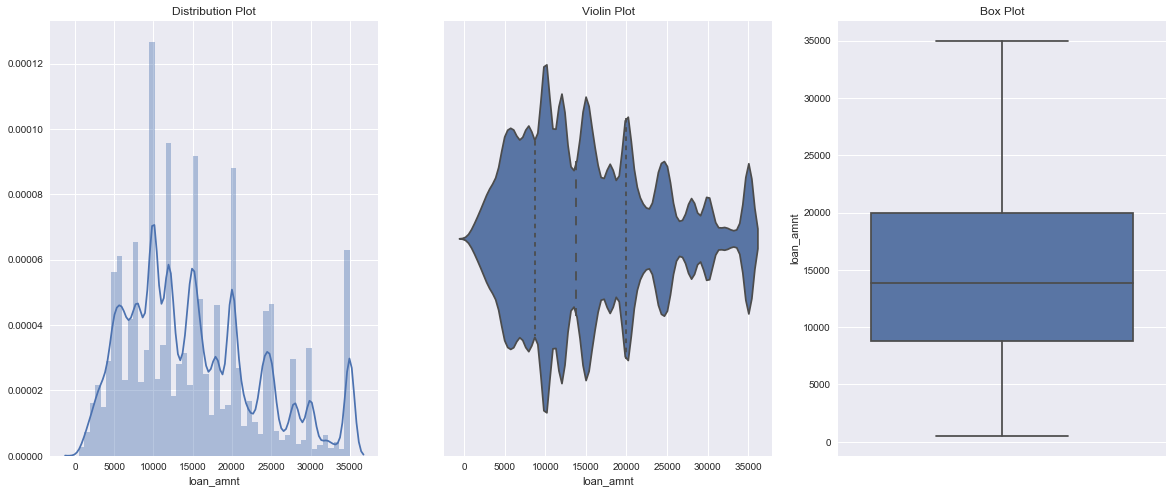

In [27]:
univariate(df=loan_data,col='loan_amnt',vartype=0)

Observation: Most of the loan amounts are distributed between 8000 to 20000 USD.

# Interest Rate

Interest Rate Distribution

C:\Users\mohan\Anaconda3\envs\cryptocurrency-analysis\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


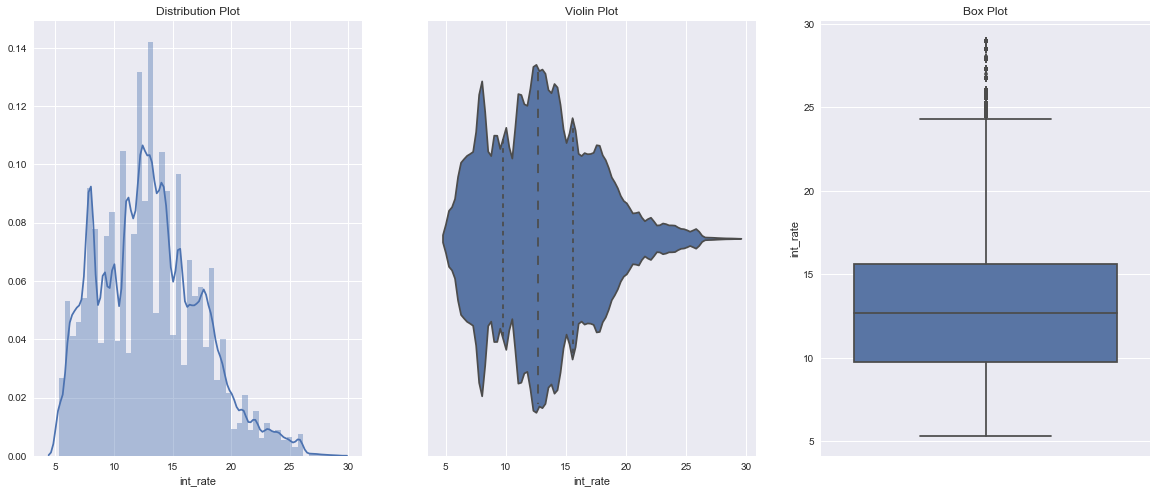

In [28]:
univariate(df=loan_data,col='int_rate',vartype=0)

Observations: Most of the loans interest rates are distributed between 10% to 16%.

# Annual Income Distribution

In [29]:
loan_data["annual_inc"].describe()

count    7.975220e+05
mean     7.544386e+04
std      6.494298e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

Max value is 9500000 which is approx 150 times more than mean value, so we will remove the outliers from Annual Income.
Remove Outliers (values from 99 to 100%)

In [30]:
q = loan_data["annual_inc"].quantile(0.995)
loan_data = loan_data[loan_data["annual_inc"] < q]
loan_data["annual_inc"].describe()

count    792578.000000
mean      72979.954981
std       39049.087112
min           0.000000
25%       46000.000000
50%       65000.000000
75%       90000.000000
max      299999.000000
Name: annual_inc, dtype: float64

C:\Users\mohan\Anaconda3\envs\cryptocurrency-analysis\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


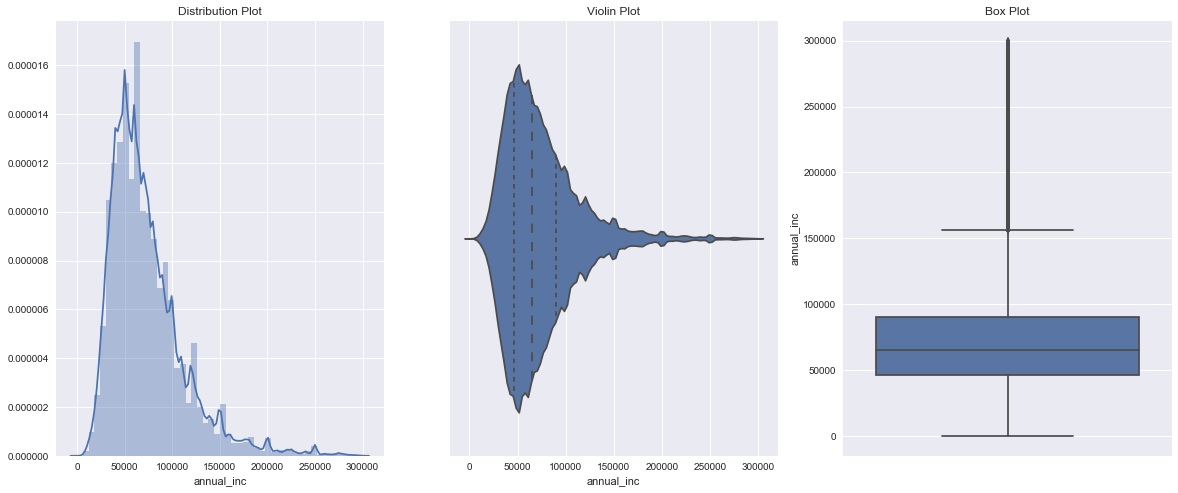

In [31]:
univariate(df=loan_data,col='annual_inc',vartype=0)

Observations: Most of the applicants earns beteen 40000 to 90000 USD annually.

# Loan Status Distribution

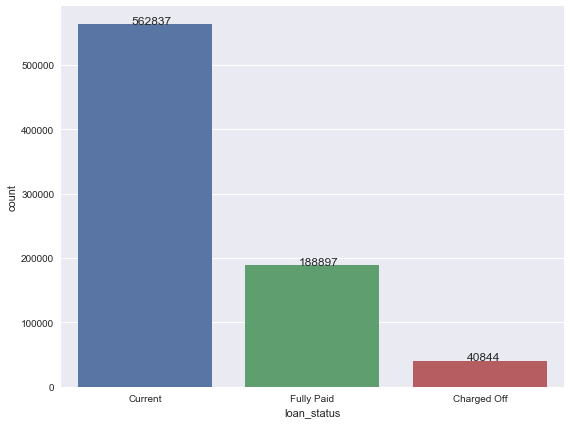

In [32]:
univariate(df=loan_data,col='loan_status',vartype=1)

Observations: 5% of the applicants Charged off.

# Relationsip between Purpose and Loan Status

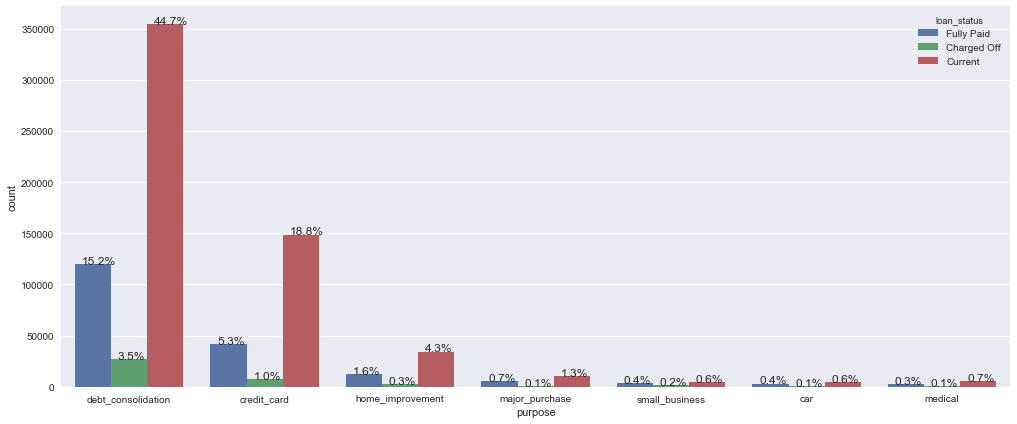

In [33]:
univariate(df=loan_data,col='purpose',vartype=1,hue='loan_status')

Observations: Approx 60% of the applicants applied loan for paying their other loans(Debt Consolidation).

In [34]:
loan_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [35]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
loan_data.drop(loan_data[loan_data['home_ownership'].isin(rem)].index,inplace=True)
loan_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [ ]:
# Relationsip between Home Ownership and Loan Status

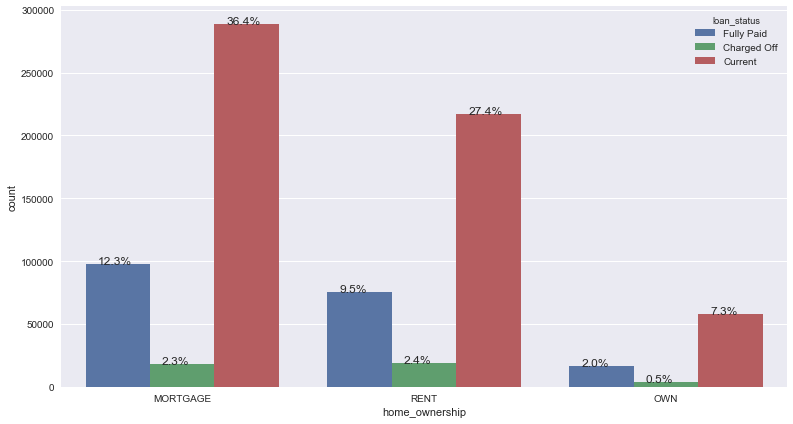

In [36]:
univariate(df=loan_data,col='home_ownership',vartype=1,hue='loan_status')

Observations: 40% of applicants are living in rented home whereas 52% applicants mortgaged their home.

# Loan Applicants Distribution

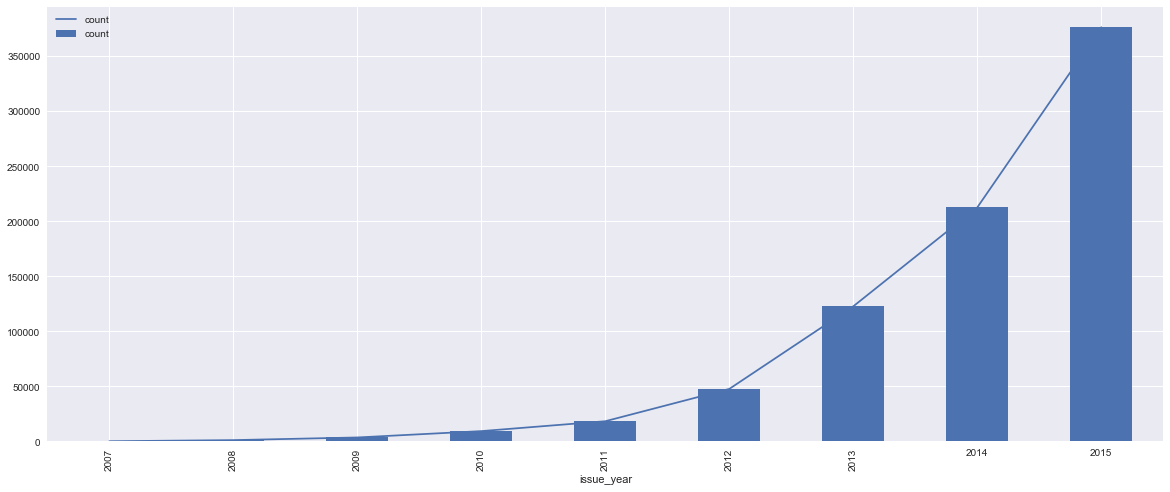

In [37]:
year_wise =loan_data.groupby(by= [loan_data.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

Observations: loan applicants are increasing year by year, approx 47% of loan applicants received loans in 2011.

# Relationsip between Term and Loan Status

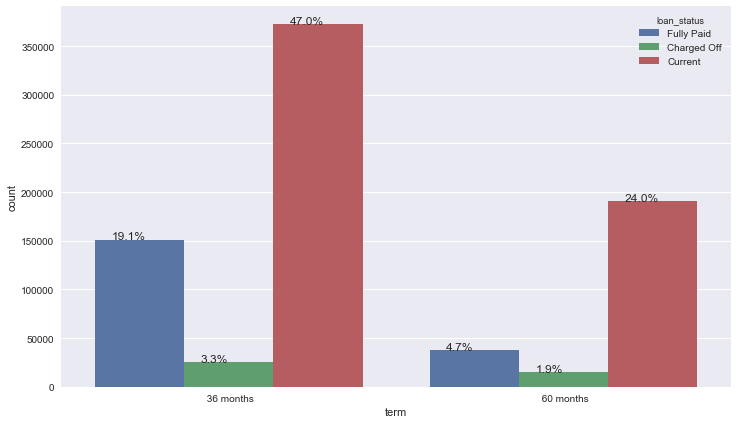

In [38]:
univariate(df=loan_data,col='term',vartype=1,hue='loan_status')

Observations: 70% of applicants applied loan for 36 months term period.

In [ ]:
# Relationsip between Purpose and Loan Amount

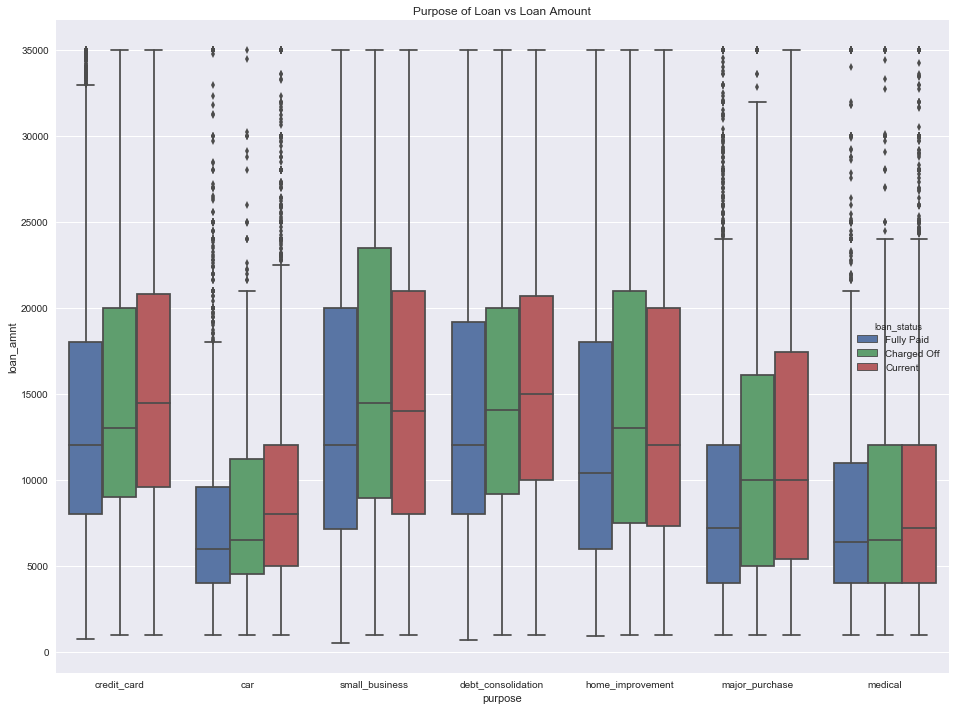

In [39]:
# Purpose of Loan vs Loan Amount for each Loan Status

plt.figure(figsize=(16,12))
sns.boxplot(data =loan_data, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [41]:
loan = pd.DataFrame(loan_data, columns = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc',
                                          'dti','loan_income_ratio'])

In [42]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_income_ratio
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.208333
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.083333
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.195886
6,7000.0,7000.0,7000.0,15.96,170.08,47004.0,23.51,0.148923
7,3000.0,3000.0,3000.0,18.64,109.43,48000.0,5.35,0.062500


In [43]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,loan_income_ratio
loan_amnt,1.000000,0.999289,0.997766,0.167422,0.942163,0.485448,0.023142,0.543571
funded_amnt,0.999289,1.000000,0.998611,0.167532,0.943168,0.485240,0.023497,0.542933
funded_amnt_inv,0.997766,0.998611,1.000000,0.167562,0.941548,0.484446,0.024236,0.541892
int_rate,0.167422,0.167532,0.167562,1.000000,0.150197,-0.104813,0.080302,0.275113
installment,0.942163,0.943168,0.941548,0.150197,1.000000,0.469372,0.017175,0.503188
annual_inc,0.485448,0.485240,0.484446,-0.104813,0.469372,1.000000,-0.104243,-0.348131
dti,0.023142,0.023497,0.024236,0.080302,0.017175,-0.104243,1.000000,0.271568
loan_income_ratio,0.543571,0.542933,0.541892,0.275113,0.503188,-0.348131,0.271568,1.000000


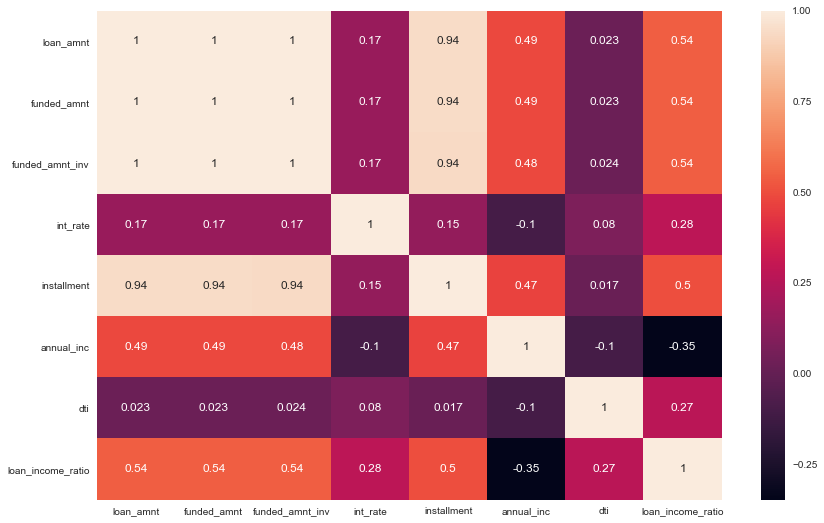

In [44]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

Observations: Heatmap shows that 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.

# Relationsip between Employment Length and Loan Amount for different purpose of loan

In [45]:
# Employment Length vs Loan Amount for different pupose of Loan

loanstatus=loan_data.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan_data.loc[loan_data['loan_status']=='Charged Off']

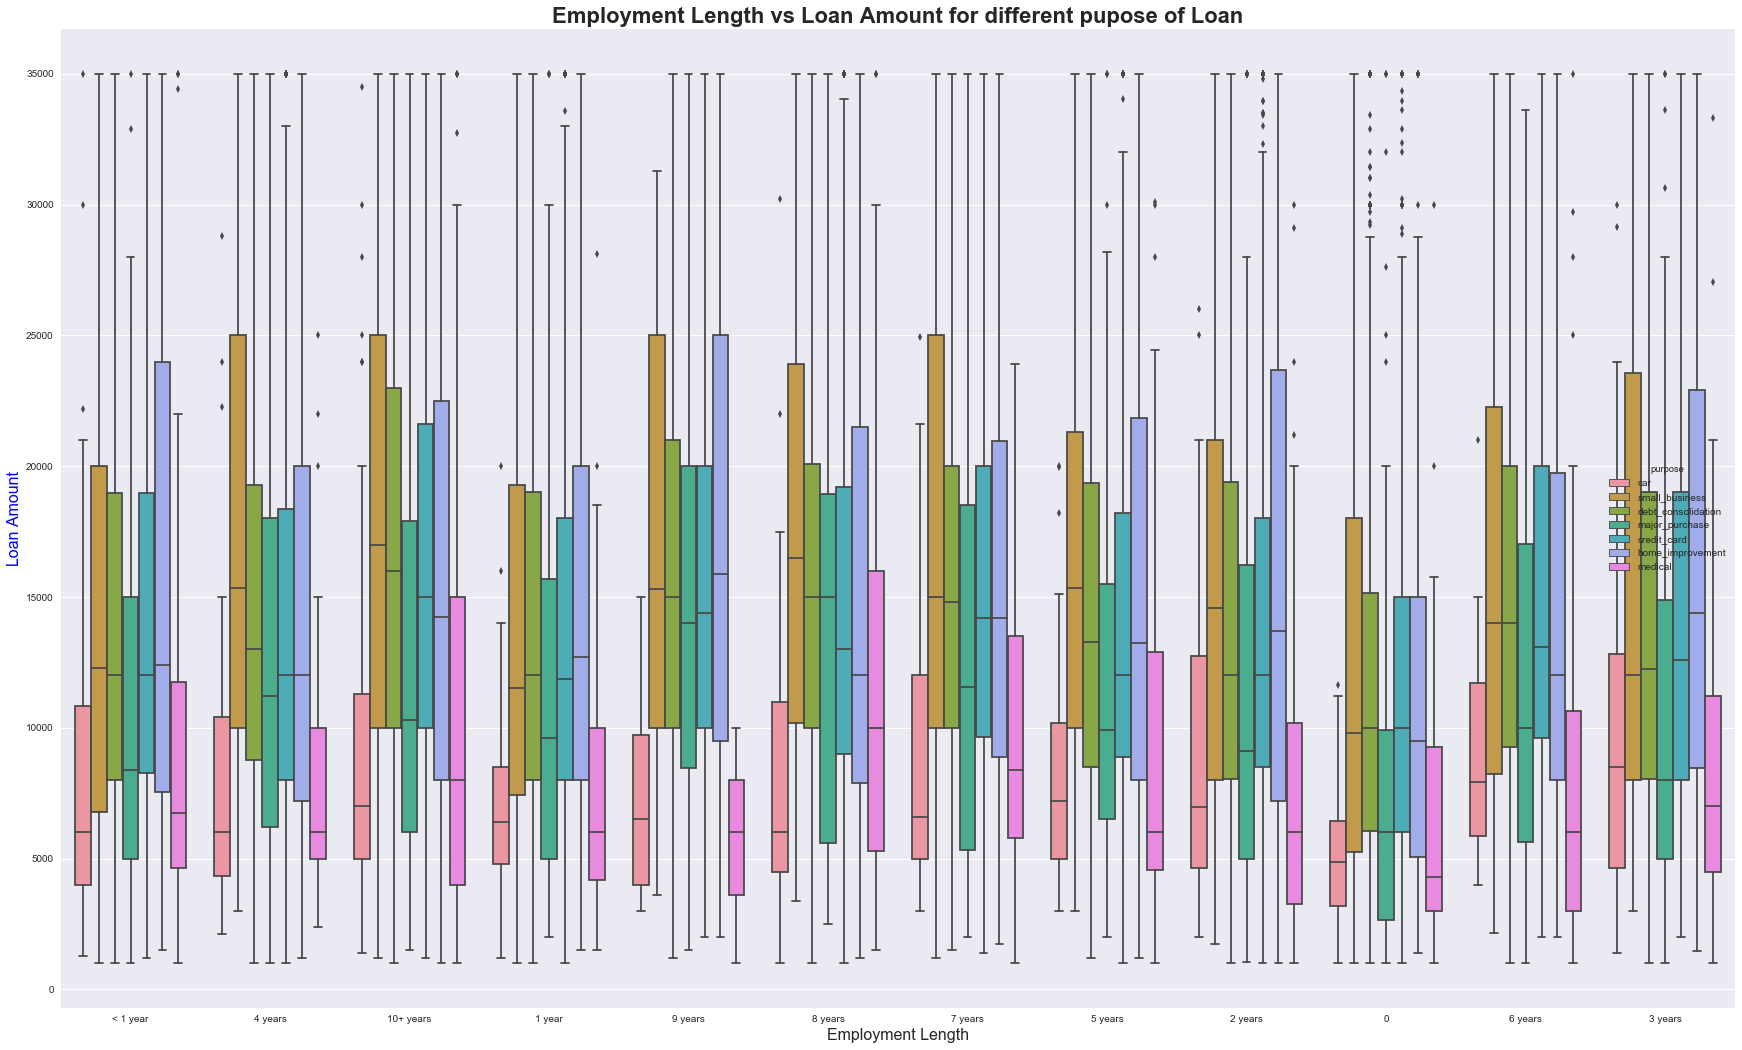

In [46]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

Categorical Variables vs Probability of Charged Off
The main goal of this use case is to find what parameters are impacting the most on Loan Status that is if a applicant will successfully complete the loan term or will charge off.

ProbabilityofChargedOff= NumberofApplicantswhochargedoff/TotalNo.ofApplicants

We will calculate this probability w.r.t each column in bivariate analysis & will see how the Probability of Charged Off changes with these columns.


In [47]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [48]:
# Probability of charge off
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

In [49]:
# Location vs Probability Charge Off

filter_states = loan_data.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

# Remove states where data is less than 10
loan_filter_states = loan_data.drop(labels = loan_data[loan_data.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
addr_state,,,,,
NJ,1638,20643,6865,29146,0.056
NM,258,3185,1035,4478,0.058
NV,722,7613,2736,11071,0.065
NY,3612,45159,15108,63879,0.057
OH,1353,19699,5764,26816,0.050
OK,390,5335,1586,7311,0.053
OR,500,6845,2604,9949,0.050
PA,1405,20443,6179,28027,0.050
RI,175,2517,805,3497,0.050


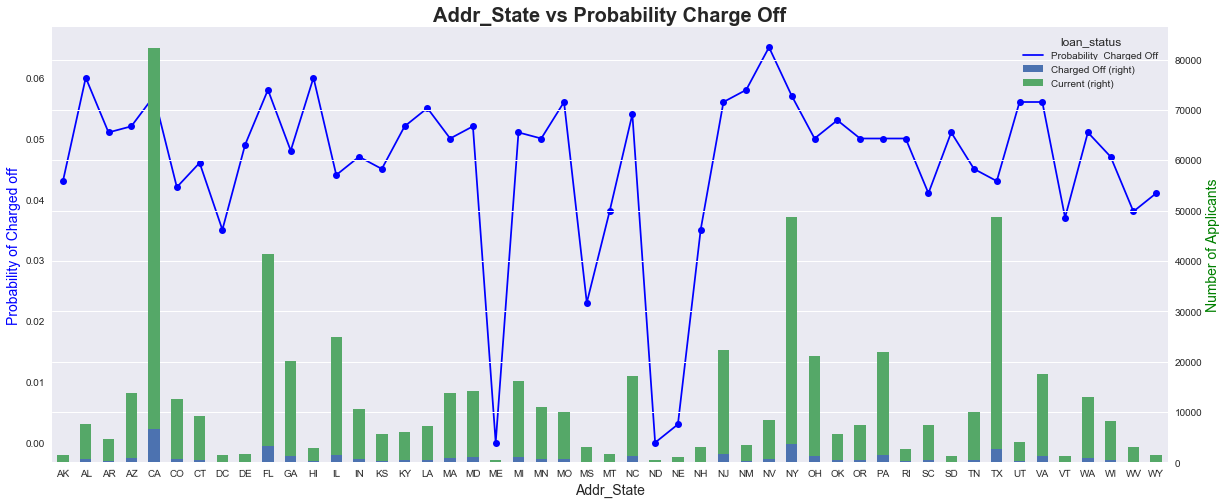

In [50]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_prob(df =loan_filter_states,col ='addr_state')

Observations: There are multiple States with high probability of charge,highest being 'NV' at 7%

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
purpose,,,,,
car,446,4914,3185,8545,0.052
credit_card,7794,148827,42018,198639,0.039
debt_consolidation,27530,354246,120218,501994,0.055
home_improvement,2252,34427,12420,49099,0.046
major_purchase,868,10220,5345,16433,0.053
medical,566,5293,2262,8121,0.070
small_business,1357,4904,3318,9579,0.142


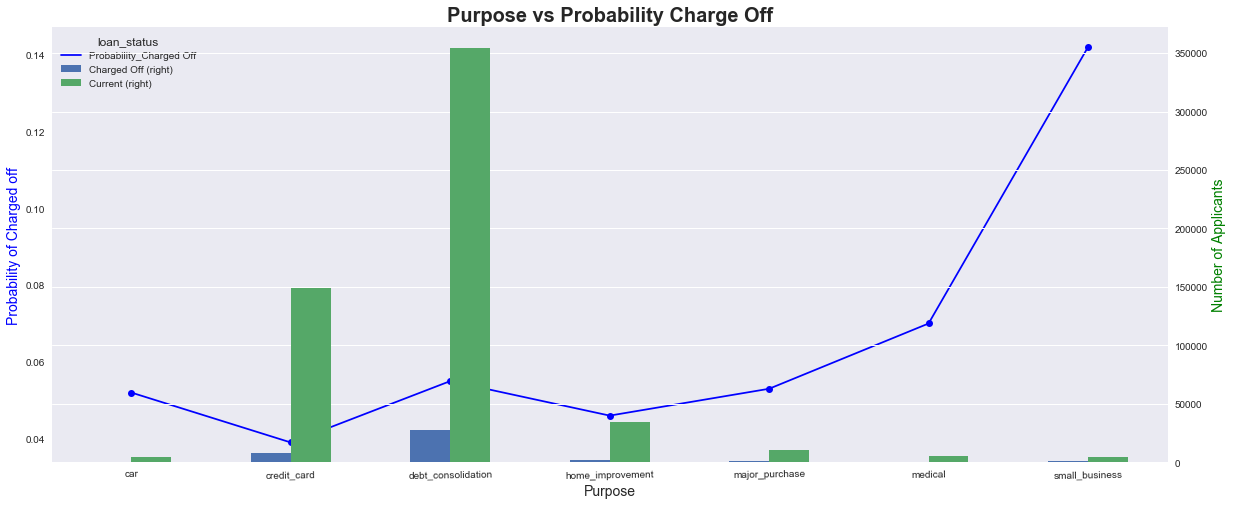

In [51]:
# Purpose of Loan vs Probability Charge Off

purpose = crosstab(loan_data,'purpose')
display(purpose)

bivariate_prob(df =loan_data,col ='purpose',stacked=False)

Observations: Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of 14%. 

Extra caution should be taken like asset or guarentee while approving the loan for purpose of 'small business'

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
grade,,,,,
A,2330,100300,36230,138860,0.017
B,8822,164195,62017,235034,0.038
C,11745,159032,48227,219004,0.054
D,9290,82962,26229,118481,0.078
E,5471,42245,11183,58899,0.093
F,2511,11704,3936,18151,0.138
G,644,2393,944,3981,0.162


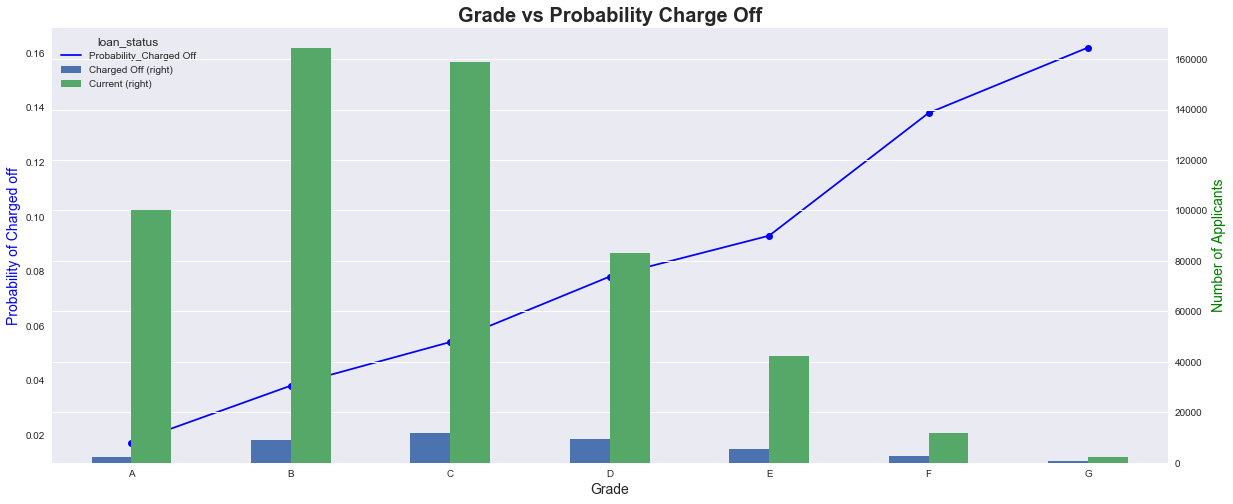

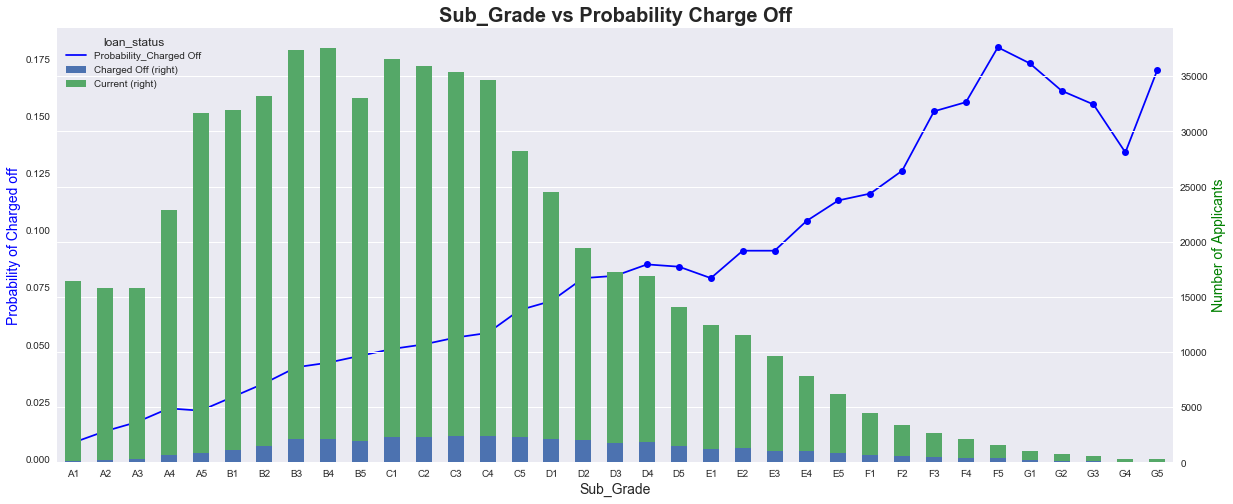

In [52]:
# Grade/Subgrade vs Probability Charge Off

grade = crosstab(loan_data,'grade')
display(grade)

bivariate_prob(df =loan_data,col ='grade',stacked=False)
bivariate_prob(df =loan_data,col ='sub_grade')

Observations: As we move from Grade A to G, probability of charged off is increasing.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
annual_inc_range,,,,,
0-25000,1997,18837,6220,27054,0.074
25000-50000,14895,159611,54695,229201,0.065
50000-75000,13075,175387,59937,248399,0.053
75000-100000,6301,106668,36086,149055,0.042
100000 and above,4545,102326,31828,138699,0.033


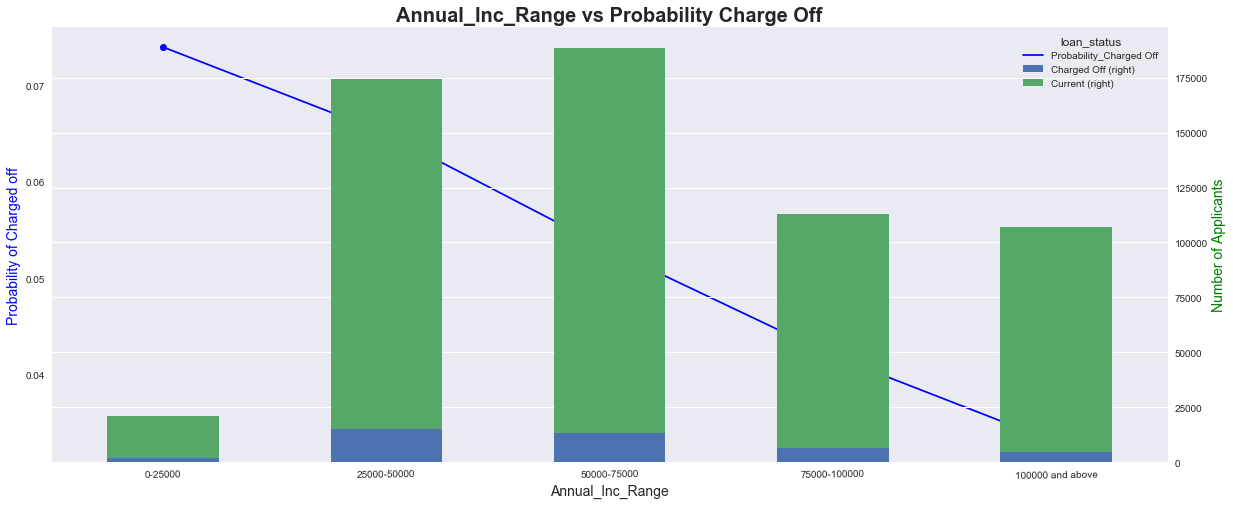

In [53]:
# Annual Income Range vs Probability Charge Off

annual_inc_range = crosstab(loan_data,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df =loan_data,col ='annual_inc_range')

Observations: As the annual income is decreasing the probability of charge off is increasing.
Highest of 7% at (0 to 25000) salary bracket.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
int_rate_range,,,,,
0-7.5,603,59504,14920,75027,0.008
7.5-10,2659,111165,31119,144943,0.018
10-12.5,5631,108166,40488,154285,0.036
12.5-15,8923,127768,43722,180413,0.049
15 and above,16160,127412,47145,190717,0.085


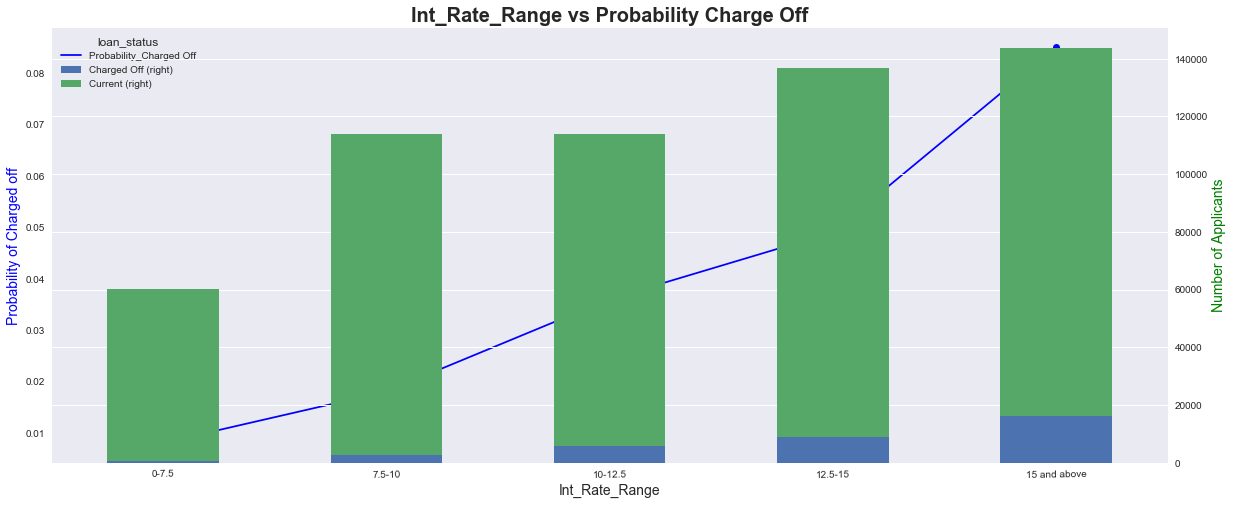

In [54]:
# Interest rate Range vs Probability Charge Off

int_rate_range = crosstab(loan_data,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =loan_data,col ='int_rate_range')

Observations: As the interest rate is increasing the probability that person will default is increasing with highest of 9% at 15% & above bracket.

loan_status,Charged Off,Current,Fully Paid,All,Probability_Charged Off
emp_length,,,,,
0,2239,30638,6611,39488,0.057
1 year,2634,35402,12435,50471,0.052
10+ years,12012,192132,58683,262827,0.046
2 years,3598,48876,17617,70091,0.051
3 years,3159,43946,15129,62234,0.051
4 years,2474,32135,12075,46684,0.053
5 years,2880,33184,13465,49529,0.058
6 years,2443,24879,11052,38374,0.064
7 years,2371,27251,10581,40203,0.059


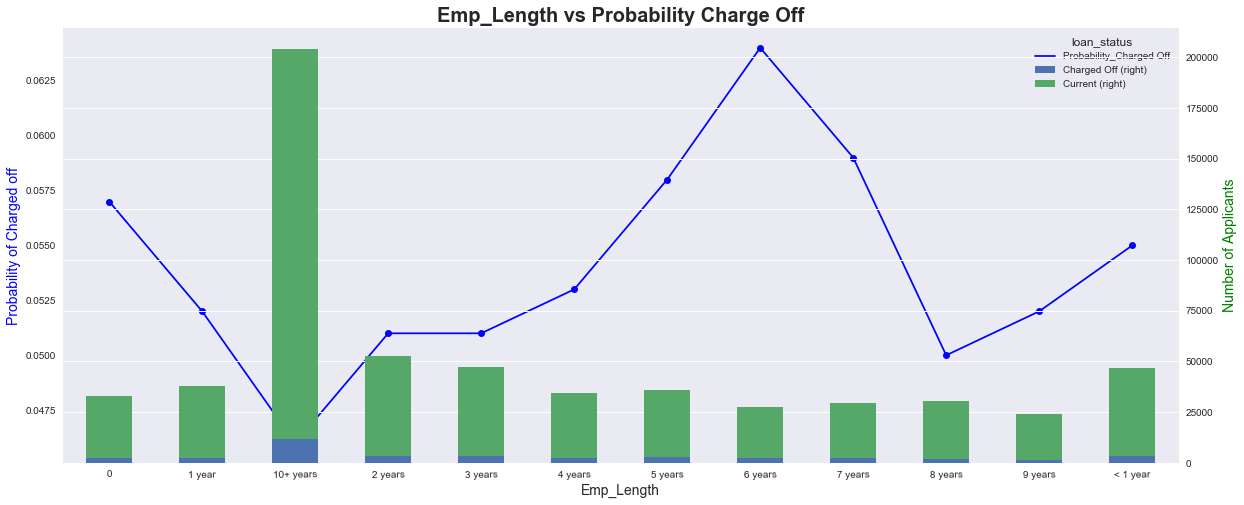

In [55]:
# Employment Length vs Probability Charge Off

emp_length = crosstab(loan_data,'emp_length')
display(emp_length)

bivariate_prob(df =loan_data,col ='emp_length')

Observations: Applicants who are self employed & less than 1 year of experience are more probable of charged off.. 

Target Variable
Loan Status

Top-5 Major variables to consider for loan prediction:
Purpose of Loan
Employment Length
Grade
Interest Rate
Term